# Fixed-point iteration method for root finding

by Xiaofeng Liu, Ph.D., P.E.
Associate Professor

Department of Civil and Environmental Engineering

Institute of CyberScience

Penn State University

223B Sackett Building, University Park, PA 16802

Web: http://water.engr.psu.edu/liu/

---

The following code uses the fixed-point iteration method to solve the equation 
\begin{equation}
 f(x) = e^{-x} - x = 0
\end{equation}

One formula for the fixed point iteration is
\begin{equation}
x_{i+1} = e^{-x_i}
\end{equation}


In [5]:
import matplotlib.pyplot as plt 
import numpy as np 
import sys

#define the function for root finding f(x)=0
#derive the x=g(x) function.
def g(x):
    return np.exp(-x)

#initial guess
x0 = 2.0 

#convergence criterion
epsilon = 1E-3

#maximum iteration number
Nmax=1000

N = 1
xold = x0
xnew = x0

while N <= Nmax:
    xold = xnew
    xnew = g(xold)
    
    if (abs((xold-xnew)/xnew)<epsilon): 
        print("Found one root x = ", xnew, " at iteration ", N)
        break
    
    N = N + 1
           
if(N == (Nmax+1)):
    print("Maximum iteration number ", Nmax, " reached. No root found.")
        
#end of code. It is better to give user some indication
#that the code is done.
print("Done!")

Found one root x =  0.566969808628573  at iteration  15
Done!


As a check, the following cell plot the function and the solution. 

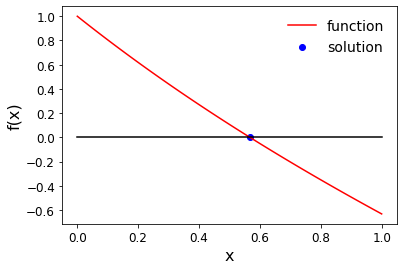

In [7]:
def f(x):
    return np.exp(-x)-x

xl, xr = 0, 1

x = np.linspace(xl,xr,100) # 100 linearly spaced numbers

y = f(x)

#scatter plot
plt.scatter(xnew, f(xnew), color='blue', marker = 'o', label='solution')

#line plot for the fitted linear curve
plt.plot(x, f(x), color='red', label='function')

#plot the f(x) = 0 line
plt.plot((xl,xr),(0,0), color='k')

#set the limit for the x and y axes
#plt.xlim([0,1.0])
#plt.ylim([5,45])

#set x and y axes label and font size
plt.xlabel('x',fontsize=16)
plt.ylabel('f(x)',fontsize=16)

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

#show legend, set its location, font size, and turn off the frame
plt.legend(loc='upper right',fontsize=14,frameon=False)

plt.show()

## Convergence of fixed-point iteration method

Fixed-point iteration method may converge or diverge. It depends on the maginute of $|g'(x)|$ in the area of interest. For it to converge, the condition for $|g'(x)|$ < 1 should be satisfied. The mathematical proof of this condition is as follows. For the equation
\begin{equation}
x = g(x),
\end{equation}
the Taylor series expansion of the function $g(x)$ around the root $x_r$ is
\begin{equation}
g(x) = g(x_r) + (x-x_r) g'(x_0) + \ldots
\end{equation}
Since $x_r$ is a root, i.e., it satisfies $x_r = g(x_r)$. Thus, 
\begin{equation}
g(x_r) - x_r \approx g'(x_r)(x-x_r)
\end{equation}

During the iteration, let $x_i$ is the $i^{th}$ estimation, then 
\begin{equation}
x_{i+1} = g(x_i)
\end{equation}

Combine everything above, one can get
\begin{equation}
x_{i+1} - x_r \approx g'(x_r)(x_{i}-x_r)
\end{equation}
This equation shows that the distance between current estimation and the true root is multiplied by $g'(x_r)$ at each iteration. So the iteration converges if $|g'(x_r)|$ < 1 and diveges if $|g'(x_r)|$ < 1. For the case of $|g'(x_r)|$ = 1, the itration may diverge or converge (both will be slow though). 

For the convergence case of $|g'(x_r)|$ < 1, there are two sub-cases:
* 0 < $g'(x_r)$ < 1: the iteration will zigzag (staircase) towards the root (Fig. a). The path will be sandwiched between the the lines of $y=x$ and $y=g(x)$. 
* -1 < $g'(x_r)$ < 0: the iteration will spiral towards the root (Fig. b). The path will jump alternatively between the lines of $y=x$ and $y=g(x)$.

Similarly, for the diergence case of $|g'(x_r)|$ > 1, there are two sub-cases:
* $g'(x_r)$ > 1: the iteration will zigzag (staircase) away from the root (Fig. c). The path will be sandwiched between the the lines of $y=x$ and $y=g(x)$. 
* $g'(x_r)$ < -1: the iteration will spiral away from the root (Fig. d). The path will jump alternatively between the lines of $y=x$ and $y=g(x)$.

![alt text](fixed_point_iteration_convergence.png)

As an example, the following code uses the fixed-point iteration method to solve the equation 
\begin{equation}
 f(x) = x^2 - 7 = 0
\end{equation}

One formula for iteration is
\begin{equation}
x_{i+1} = \frac{7}{x_i}
\end{equation}

So $g(x)=\frac{7}{x}$. Thus, 
\begin{equation}
g'(x) = -\frac{7}{x^2}
\end{equation}

The root is around 2.5. So in the area of interest, $g'(x=2.5)=-7/2.5^2$>1. The iteration will diverge. 

In [10]:
#define the function for root finding f(x)=0
#derive the x=g(x) function.
def g(x):
    return 7.0/x

#initial guess
x0 = 2

#convergence criterion
epsilon = 1E-3

#maximum iteration number
Nmax=1000

N = 1
xold = x0
xnew = x0

while N <= Nmax:
    xold = xnew
    xnew = g(xold)
    
    if (abs((xold-xnew)/xnew)<epsilon): 
        print("Found one root x = ", xnew, " at iteration ", N)
        break
    
    N = N + 1
           
if(N == (Nmax+1)):
    print("Maximum iteration number ", Nmax, " reached. No root found.")
        
#end of code. It is better to give user some indication
#that the code is done.
print("Done!")

Maximum iteration number  1000  reached. No root found.
Done!


---
The above iteration scheme failed. However, it does not mean the fixed-point iteration method is applicable for finding the roots of $f(x) = x^2 -7 = 0$. Indeed, a different formulation can be used. The equation can be equivalently written as
\begin{equation}
x = \frac{x+7}{x+1}
\end{equation}
where 
\begin{equation}
g(x) = \frac{x+7}{x+1}
\end{equation}

The root is around 2.5. In the area of interest, 
\begin{equation}
|𝑔'(𝑥=2.5)|=|-\frac{6}{(x+1)^2}|=|-\frac{6}{(2.5+1)^2}| = 0.49 < 1. 
\end{equation}
The iteration will converge. The following code shows this point.

In [12]:
#define the function for root finding f(x)=0
#derive the x=g(x) function.
def g(x):
    return (x+7.0)/(x+1.0)

#initial guess
x0 = 2

#convergence criterion
epsilon = 1E-3

#maximum iteration number
Nmax=1000

N = 1
xold = x0
xnew = x0

while N <= Nmax:
    xold = xnew
    xnew = g(xold)
    
    if (abs((xold-xnew)/xnew)<epsilon): 
        print("Found one root x = ", xnew, " at iteration ", N)
        break
    
    N = N + 1
           
if(N == (Nmax+1)):
    print("Maximum iteration number ", Nmax, " reached. No root found.")
        
#end of code. It is better to give user some indication
#that the code is done.
print("Done!")

Found one root x =  2.6463238827486784  at iteration  9
Done!


Thus, it is important to keep in mind that when developping the fixed-point iteration schemes, the scheme is not unique. One should choose the scheme which has $|g'(x)|$<1.